In [1]:
# RELATORIO PARA EXIBIÇÃO DE PROGRESSÃO DE VOTOS POR ANO

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

eleicao_2016 = pd.read_excel('eleicao_vereador_2016_spa.xlsx')
eleicao_2020 = pd.read_excel('eleicao_vereador_2020_spa.xlsx')
eleicao_2024 = pd.read_excel('eleicao_vereador_2024_spa.xlsx')

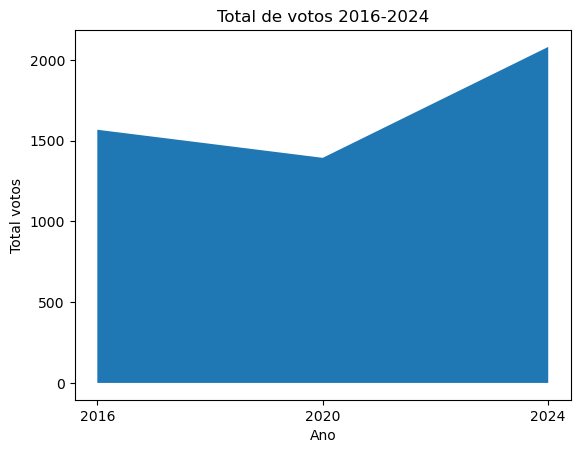

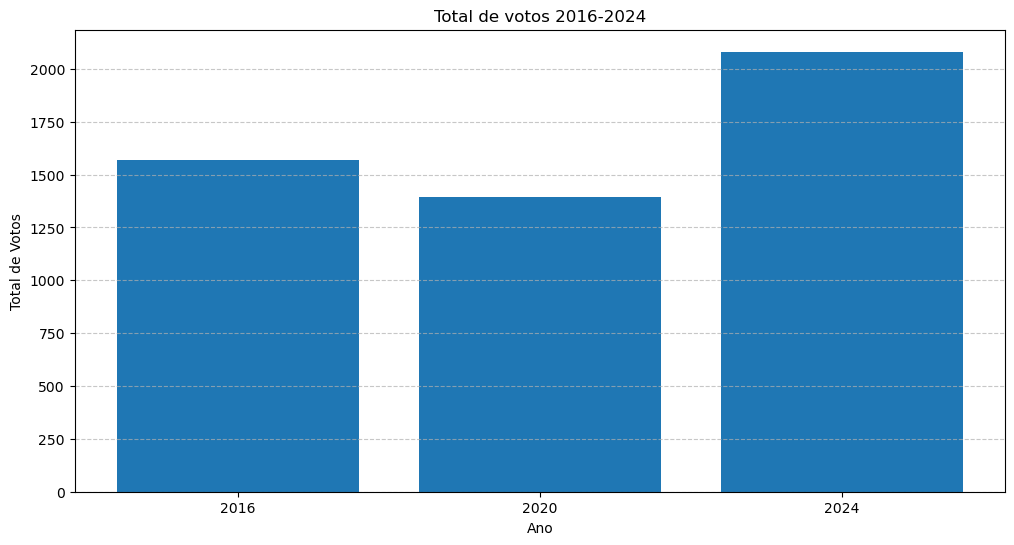

In [2]:
#Verifica quantos votos o candidato recebeu nas eleições de 2016 a 2024
#Elabora gráfico de Barras e Área mostrando o total de votos em cada ano

#Criação de um dicionário para armazenar os resultados
resultatos_votos = {}

#Realiza a soma de votos do candidado em cada ano
#2016
soma_voto = eleicao_2016[eleicao_2016['nr_votavel'] == 43123]['qt_votos'].sum()
resultatos_votos[43123] = {'2016': soma_voto}
#2020
soma_voto = eleicao_2020[eleicao_2020['nr_votavel'] == 77000]['qt_votos'].sum()
resultatos_votos[77000] = {'2020': soma_voto}
#2024
soma_voto = eleicao_2024[eleicao_2024['nr_votavel'] == 22333]['qt_votos'].sum()
resultatos_votos[22333] = {'2024':soma_voto}

#Conversão do dicionário para lista
resultados_lista = []
for nr_votavel, anos in resultatos_votos.items():
    for ano, total_votos in anos.items():
        resultados_lista.append({'ano': ano, 'nr_votavel': nr_votavel, 'total_votos': total_votos})

#DataFrame com as informações do total de votos de cada ano do candidato
resultados_df = pd.DataFrame(resultados_lista)

#Gráfico de Área
x = resultados_df['ano']
y = resultados_df['total_votos']
plt.fill_between(x, y)
plt.xlabel('Ano')
plt.ylabel('Total votos')
plt.title('Total de votos 2016-2024')
plt.show()

# Gráfico de Barras
plt.figure(figsize=(12, 6))
plt.bar(resultados_df['ano'], resultados_df['total_votos'])
plt.xlabel('Ano')
plt.ylabel('Total de Votos')
plt.title('Total de votos 2016-2024')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [3]:
# Criado DataFrame para filto de bairros dos locais de votação

secao_bairro = pd.read_excel('secao_bairro.xlsx')
colunas_para_remover = ['número da Zona', 'Município do local de votação', 'Seções instaladas']
secao_bairro.drop(columns=colunas_para_remover, axis=1,inplace=True)

# Remove as informações duplicadas
secao_bairro.drop_duplicates(inplace=True)
secao_bairro.rename(columns={'Nome do local de votação': 'nm_local_votacao', 'Bairro do local de votação': 'nm_bairro'}, inplace=True)
secao_bairro

,nm_local_votacao,nm_bairro
0,COLÉGIO ESTADUAL ALMIRANTE TAMANDARÉ,BAIXO GRANDE
7,ESCOLA MUNICIPAL MANOEL MORAES DA SILVA,CAMPO REDONDO
11,CIEP 272 - GABRIEL JOAQUIM DOS SANTOS (SÃO JOÃO),SÃO JOÃO
13,ESCOLA MUNICIPAL LUIZA TERRA DE ANDRADE,CAMPO REDONDO
17,ESCOLA MUNICIPAL VITAL BRASIL,PONTA DO AMBRÓSIO
20,ESCOLA MUNICIPALIZADA JOSÉ GUIMARÃES,PORTO DA ALDEIA
25,ESCOLA MUNICIPALIZADA LUCINDA FRANCISCONE MEDE...,PORTO DO CARRO
27,FAETEC,NOVA SÃO PEDRO
28,CIEP 146 - CORDELINO TEIXEIRA PAULO (ESTAÇÃO),ESTAÇÃO
38,COLÉGIO ESTADUAL JOSÉ RASCÃO,SÃO JOSÉ


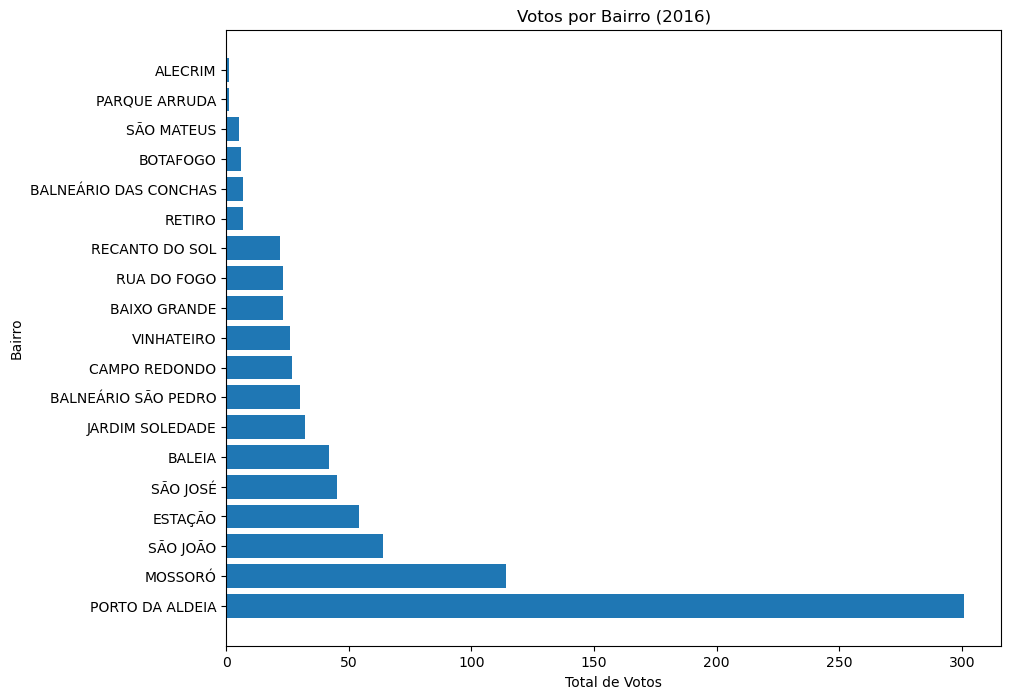

In [4]:
#Elaboração de Gráfico de Barras horizontal por bairro em 2016

# Filtra o candidato na eleição de 2016
candidato = eleicao_2016[eleicao_2016['nr_votavel'] == 43123]
candidato2016 = candidato.merge(secao_bairro, on='nm_local_votacao')

# Seleciona as colunas de interesse
colunas_interesse = ['nm_local_votacao', 'nm_bairro', 'nr_secao', 'nr_votavel', 'nm_votavel', 'qt_votos']
candidato2016 = candidato2016[colunas_interesse]

# Calcula o total de votos por bairro em ordem decrescente
resultado_2016 = candidato2016.groupby('nm_bairro')['qt_votos'].sum().reset_index()
resultado_2016.columns = ['nm_bairro', 'total_votos']
resultado_2016 = resultado_2016.sort_values(by='total_votos', ascending=False)

# Gráfico de Barras horizontais
plt.figure(figsize=(10, 8))
plt.barh(resultado_2016['nm_bairro'], resultado_2016['total_votos'])
plt.xlabel('Total de Votos')
plt.ylabel('Bairro')
plt.title('Votos por Bairro (2016)')
plt.show()

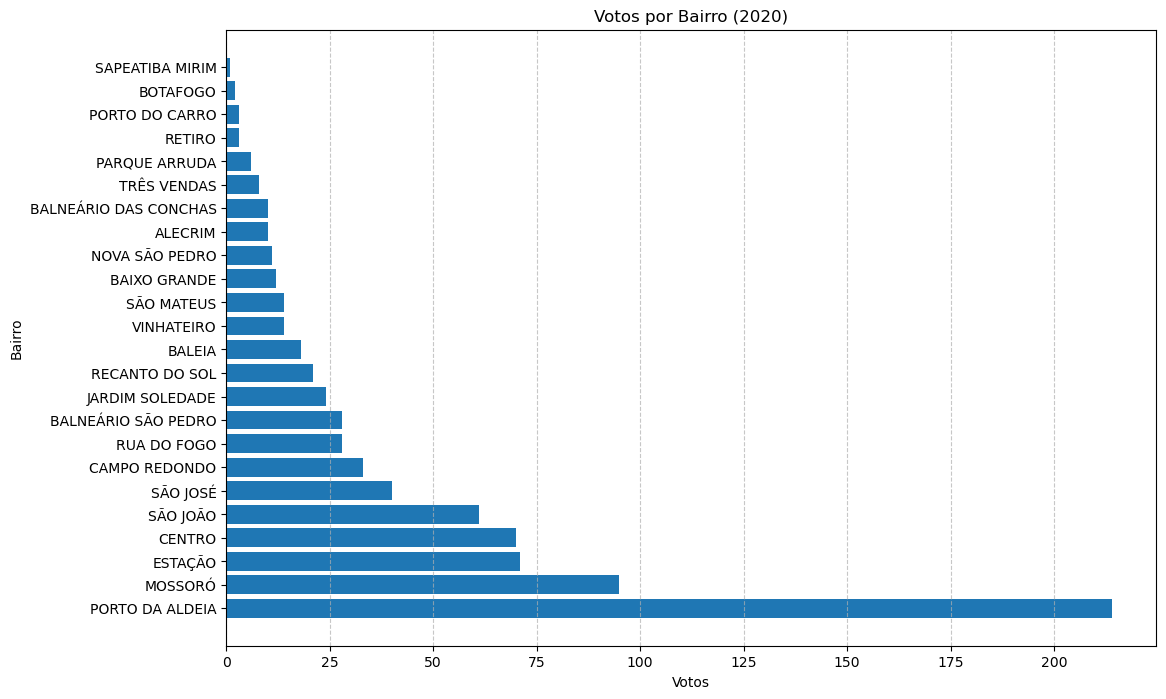

In [5]:
#Elaboração de Gráfico de Barras horizontal por bairro em 2020

# Filtra o candidato na eleição de 2020
candidato = eleicao_2020[eleicao_2020['nr_votavel'] == 77000]
candidato2020 = candidato.merge(secao_bairro, on='nm_local_votacao')

# Seleciona as colunas de interesse
colunas_interesse = ['nm_local_votacao', 'nm_bairro', 'nr_secao', 'nr_votavel', 'nm_votavel', 'qt_votos']
candidato2020 = candidato2020[colunas_interesse]

# Calcula o total de votos por bairro em ordem decrescente
resultado_2020 = candidato2020.groupby('nm_bairro')['qt_votos'].sum().reset_index()
resultado_2020.columns = ['nm_bairro', 'total_votos']

resultado_2020 = resultado_2020.sort_values(by='total_votos', ascending=False)

# Gráfico de Barras Horizontais
plt.figure(figsize=(12, 8))
plt.barh(resultado_2020['nm_bairro'], resultado_2020['total_votos'])
plt.xlabel('Votos')
plt.ylabel('Bairro')
plt.title('Votos por Bairro (2020)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

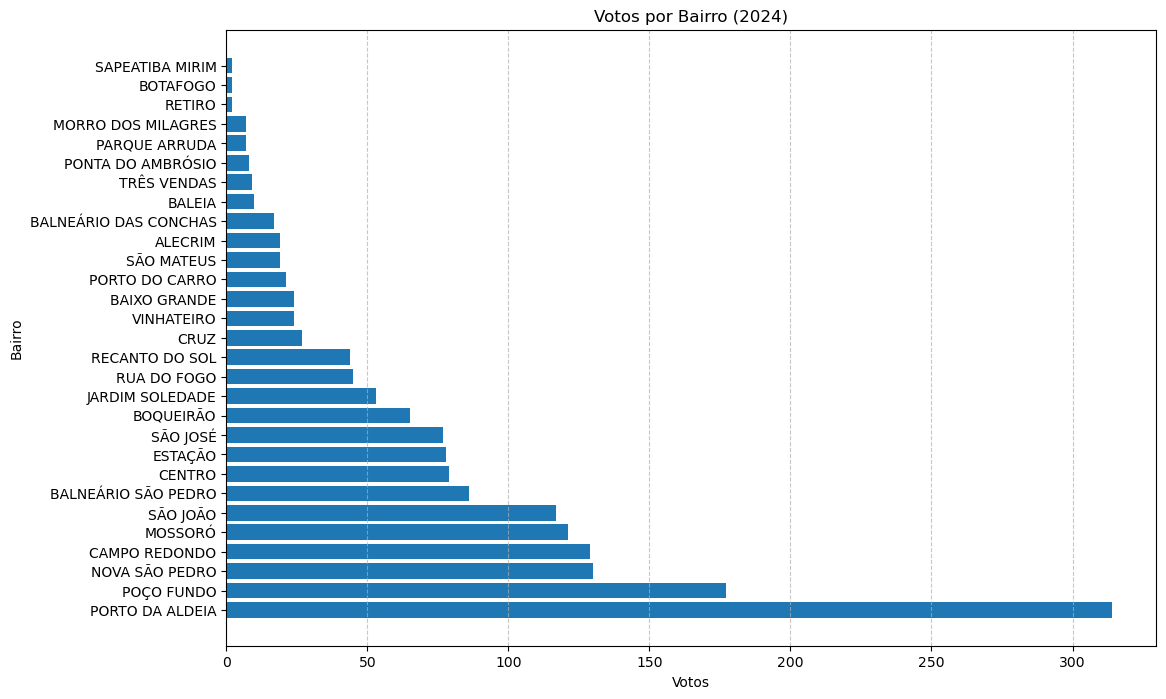

In [6]:
#Elaboração de Gráfico de Barras horizontal por bairro em 2024

#Filtra o candidato na eleição de 2024
candidato = eleicao_2024[eleicao_2024['nr_votavel'] == 22333]
candidato2024 = candidato.merge(secao_bairro, on='nm_local_votacao')

# Seleciona as colunas de interesse
colunas_interesse = ['nm_local_votacao', 'nm_bairro', 'nr_secao', 'nr_votavel', 'nm_votavel', 'qt_votos']
candidato2024 = candidato2024[colunas_interesse]

# Calcula o total de votos por bairro em ordem decrescente
resultado_2024 = candidato2024.groupby('nm_bairro')['qt_votos'].sum().reset_index()
resultado_2024.columns = ['nm_bairro', 'total_votos']
resultado_2024 = resultado_2024.sort_values(by='total_votos', ascending=False)

# Gráfico de Barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(resultado_2024['nm_bairro'], resultado_2024['total_votos'])
plt.xlabel('Votos')
plt.ylabel('Bairro')
plt.title('Votos por Bairro (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

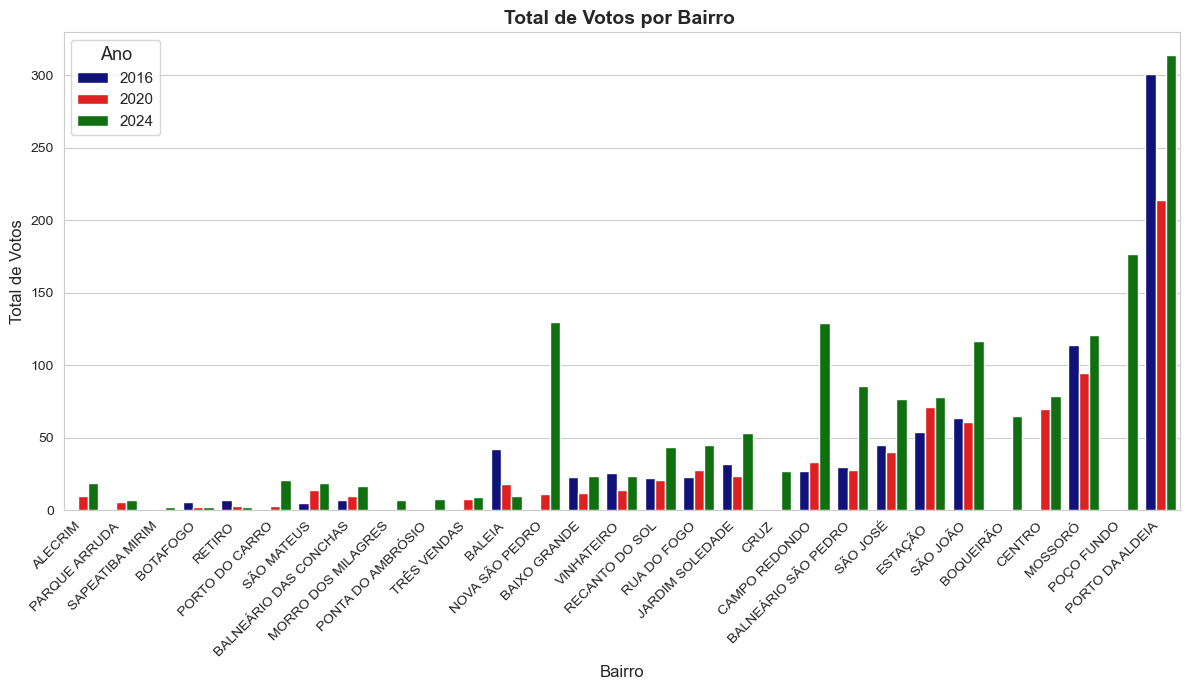

In [7]:
#Elaboração de Gráfico de Barras mostrando os votos por bairro nos anos de 2016-2024

#Cria um dataframe pra conter todas as informações
resultado_2016['ano'] = 2016
resultado_2020['ano'] = 2020
resultado_2024['ano'] = 2024

resultados = pd.concat([resultado_2016, resultado_2020, resultado_2024], ignore_index=True)
# Ordena o DataFrame pelo total de votos para facilitar a visualização ordenada
resultados = resultados.sort_values(by='total_votos', ascending=True)

#Gráfico de Barras

# Configurações do gráfico
cores = {2016: 'darkblue', 2020: 'red', 2024: 'green'}

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.set_palette("viridis")  # Escolha uma paleta de cores que facilite a distinção dos anos

# Criação do gráfico de barras
grafico = sns.barplot(data=resultados, x='nm_bairro', y='total_votos', hue='ano', palette=cores)

# Ajustes adicionais para melhorar a estética do gráfico
grafico.set_xlabel('Bairro', fontsize=12)
grafico.set_ylabel('Total de Votos', fontsize=12)
grafico.set_title('Total de Votos por Bairro ', fontsize=14, fontweight='bold')
grafico.legend(title='Ano', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Exibe o gráfico
plt.show()